In [1]:
# Import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [2]:
# Membaca file
url = "D:/Coding/Pembelajaran Mesin/Pembelajaran_Mesin/UTS/Data/Facebook Historical Stock Price.csv"
df = pd.read_csv(url)

### Exploratory Data Analysis (EDA)

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2172,2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100
2173,2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800
2174,2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300
2175,2021-01-11,260.480011,263.470001,255.899994,256.839996,256.839996,30412300


In [4]:
df.shape

(2177, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2177 non-null   object 
 1   Open       2177 non-null   float64
 2   High       2177 non-null   float64
 3   Low        2177 non-null   float64
 4   Close      2177 non-null   float64
 5   Adj Close  2177 non-null   float64
 6   Volume     2177 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 119.2+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000,2.177000e+03
mean,124.574938,126.023271,123.076050,124.606725,124.606725,3.209257e+07
std,68.433515,69.242731,67.619477,68.474961,68.474961,2.855388e+07
min,18.080000,18.270000,17.549999,17.730000,17.730000,5.913100e+06
25%,71.080002,71.970001,69.959999,71.290001,71.290001,1.618790e+07
50%,121.389999,122.199997,120.070000,121.220001,121.220001,2.328280e+07
75%,177.949997,179.190002,176.149994,177.639999,177.639999,3.770880e+07
max,300.160004,304.670013,293.049988,303.910004,303.910004,5.735764e+08


In [7]:
df.corr() # Korelasi antar kolom

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20604\2738075262.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # Korelasi antar kolom


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999753,0.999707,0.999478,0.999478,-0.436236
High,0.999753,1.000000,0.999618,0.999731,0.999731,-0.431549
Low,0.999707,0.999618,1.000000,0.999745,0.999745,-0.441927
Close,0.999478,0.999731,0.999745,1.000000,1.000000,-0.436988
Adj Close,0.999478,0.999731,0.999745,1.000000,1.000000,-0.436988
Volume,-0.436236,-0.431549,-0.441927,-0.436988,-0.436988,1.000000


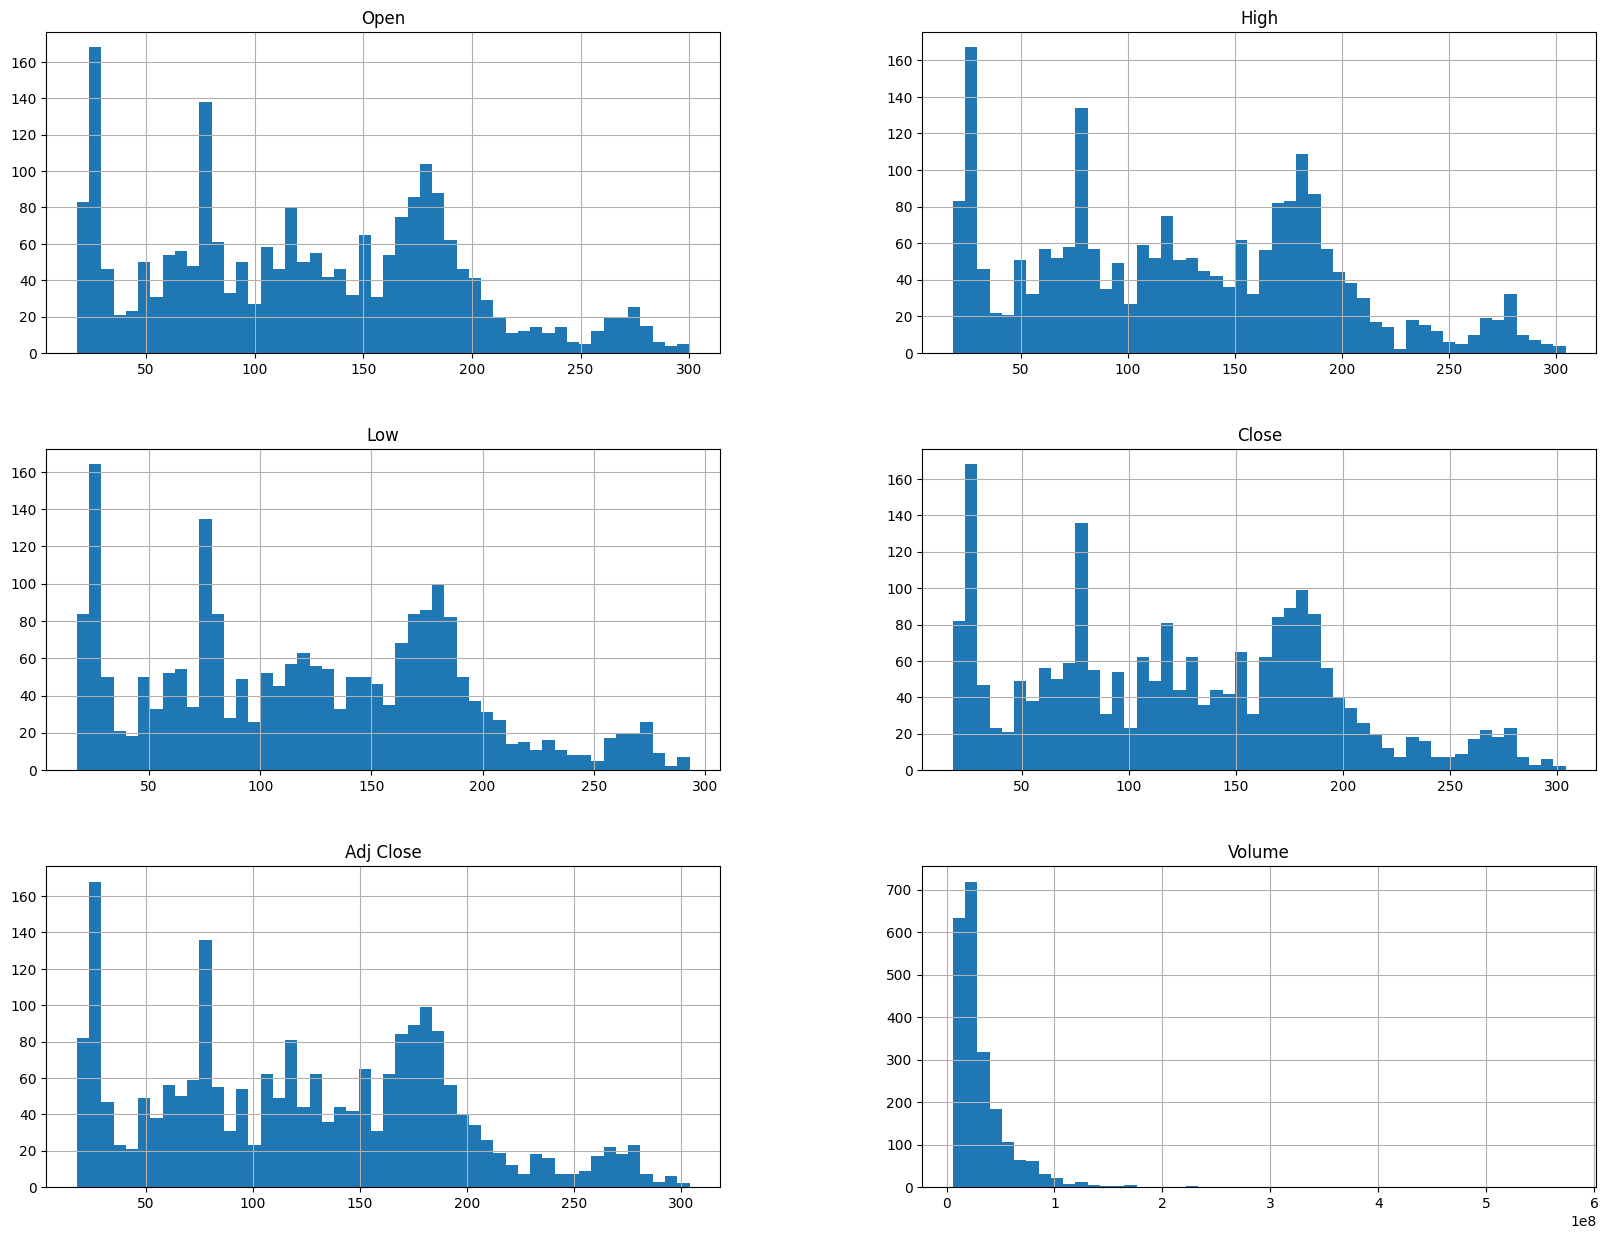

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Preprocessing

In [9]:
df.isna().sum() # Mengecek jumlah data yang kosong

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.dropna() # Mengapus data yang yang kosong

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2172,2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100
2173,2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800
2174,2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300
2175,2021-01-11,260.480011,263.470001,255.899994,256.839996,256.839996,30412300


In [11]:
df[df.duplicated()] # Identifikasi data yang duplikat pada baris kolom

,Date,Open,High,Low,Close,Adj Close,Volume


In [12]:
# df.duplicated()
df.duplicated().sum() # Menghitung jumlah data yang duplikasi

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2177 non-null   object 
 1   Open       2177 non-null   float64
 2   High       2177 non-null   float64
 3   Low        2177 non-null   float64
 4   Close      2177 non-null   float64
 5   Adj Close  2177 non-null   float64
 6   Volume     2177 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 119.2+ KB


Menghitung pergerakan harga saham dengan mencari selisih antara harga bukan dan harga tutup atau dapat dirumuskan yakni:

<b>movment = close - open </b>

Catatan:
Perusahaan yang memiliki jumlah pergerakan harga saham <b>negatif idealnya lebih sering dijual</b> sedangkan perusahaan yang memiliki jumlah pergerakan harga saham <b>positif idealnya lebih sering dibeli</b> berdasarkan definisi 'pergerakan' kita.

In [14]:
stock_open = np.array(df["Open"]).T
stock_close = np.array(df["Close"]).T

In [15]:
movement = stock_close - stock_open
df['Movement'] = movement

In [16]:
# Mengetahui jumlah pergerakan harga saham disemua hari
sum_movement = np.sum(movement)
sum_movement

69.19983900000011

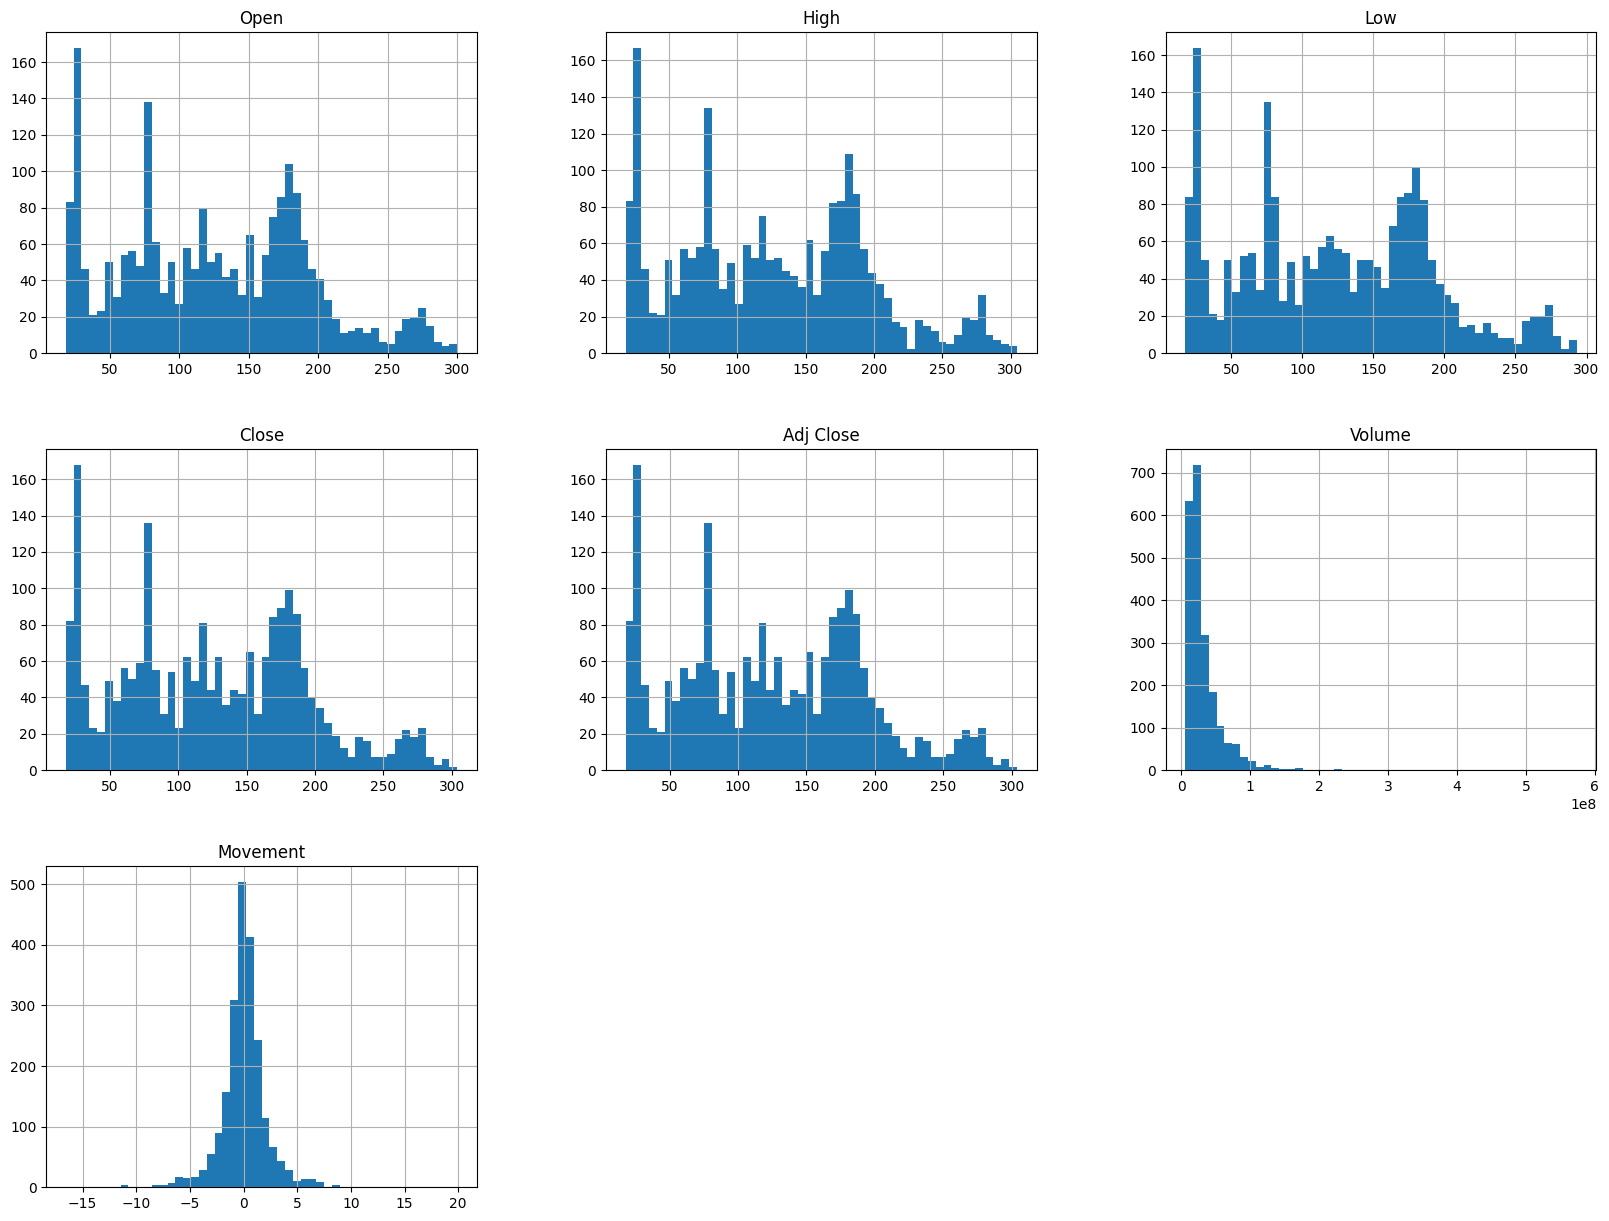

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()

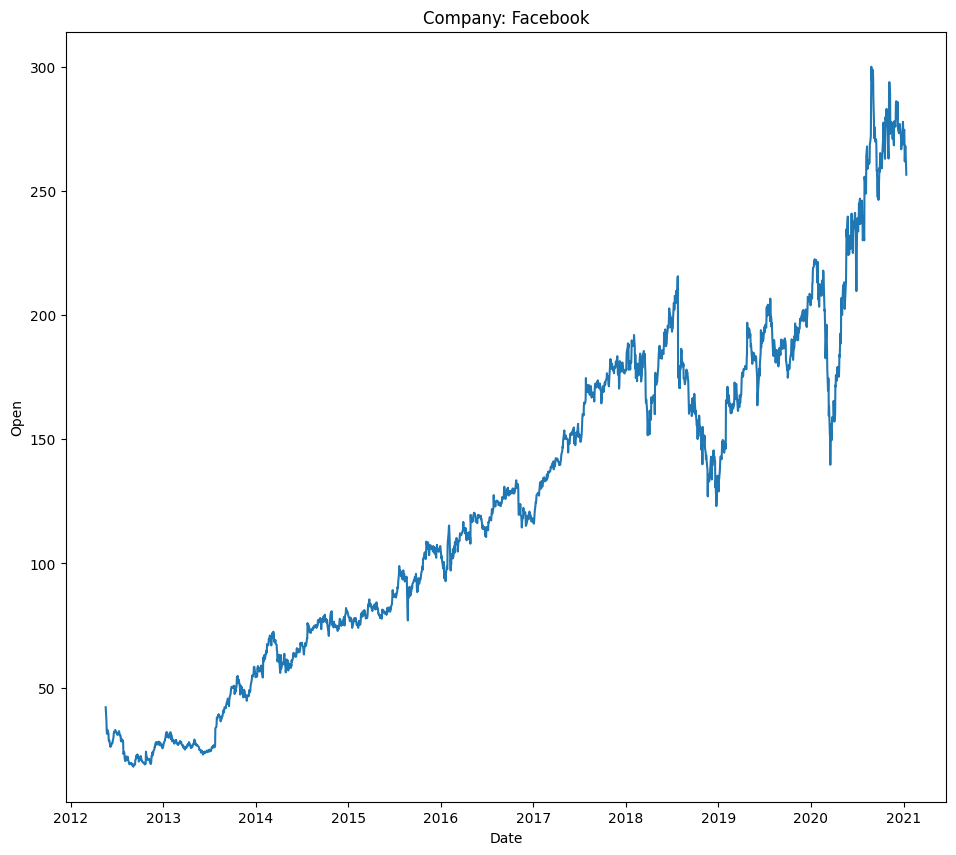

In [18]:
# Visualize the trends in the opening and closing stock prices
plt.figure(figsize = (25, 10))

# Set the date column as the index of the DataFrame (if not already)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Display the trends for Amazon
plt.subplot(1, 2, 1)
plt.title('Company: Facebook')
plt.xlabel('Date')
plt.ylabel('Open')
plt.plot(df['Open'])

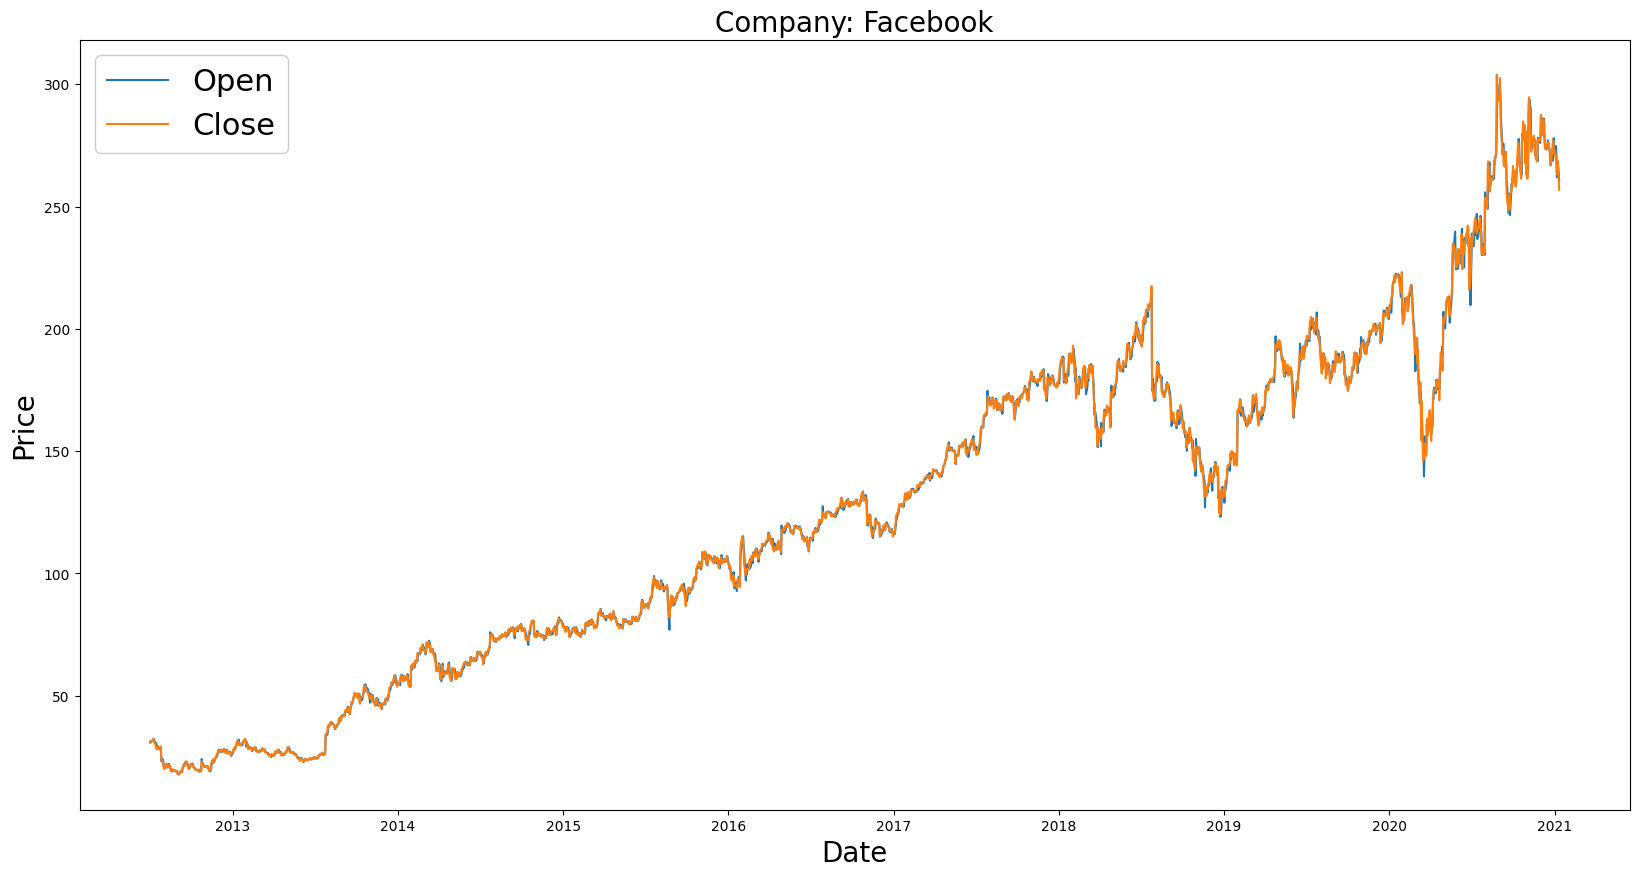

In [19]:
# Visualize the comparison of closing and opening prices from the last 30 days of Amazon stock
plt.figure(figsize = (20, 10))

plt.title('Company: Facebook', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.plot(df.iloc[30:-1]['Open'], label = 'Open')
plt.plot(df.iloc[30:-1]['Close'], label = 'Close')
plt.legend(loc = 'upper left', frameon = True, framealpha = 1, prop = {'size': 22})

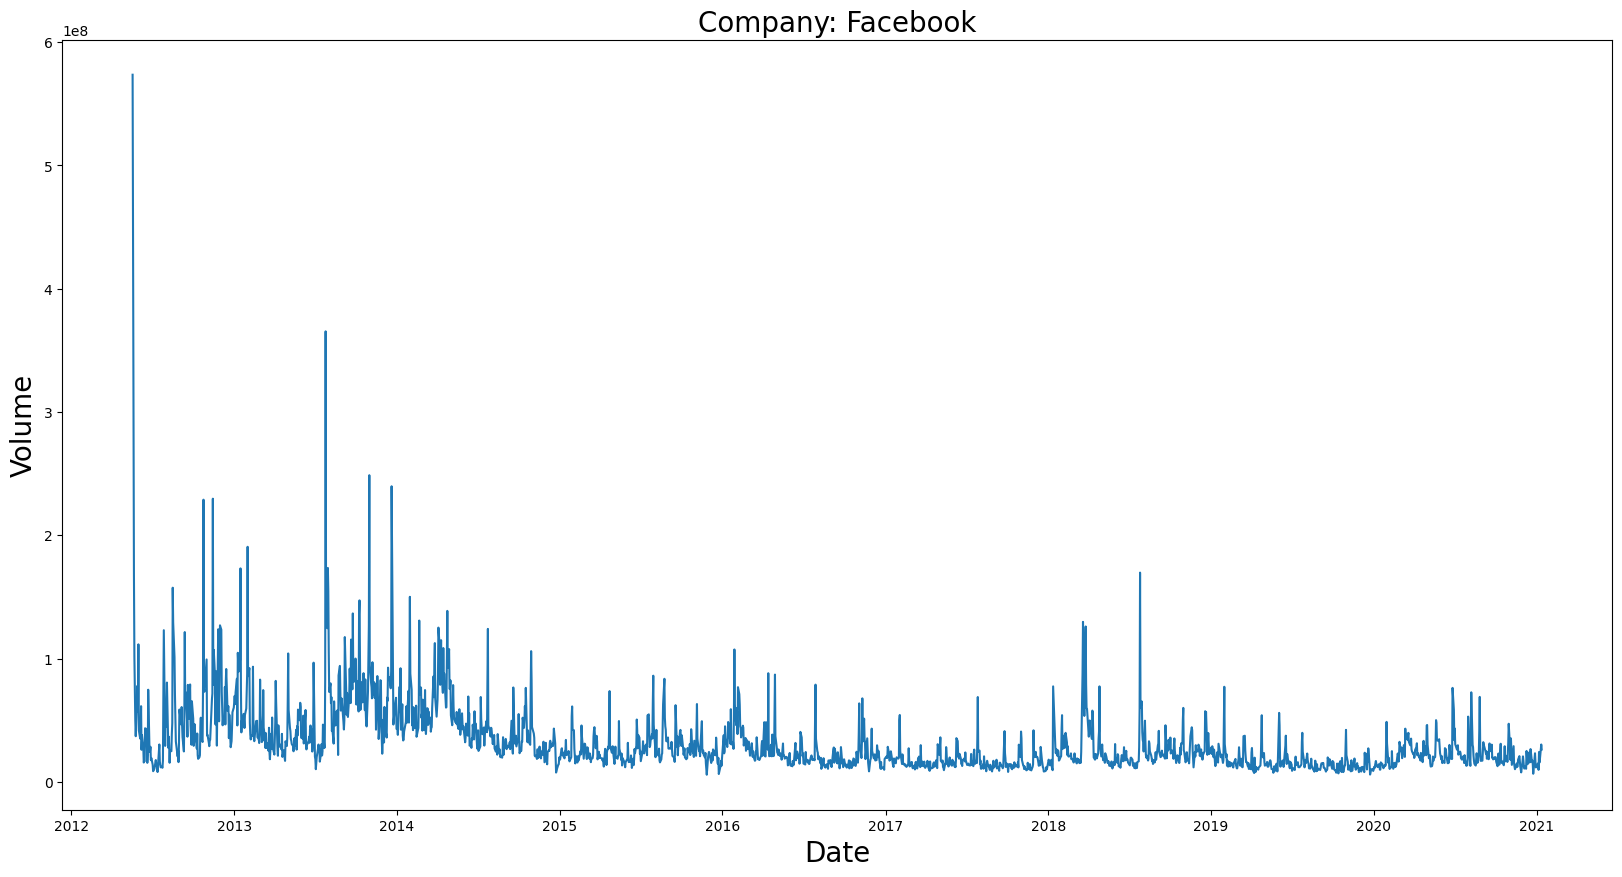

In [20]:
# Display the volume of the stocks traded on certain days by year
plt.figure(figsize = (20, 10))
plt.title('Company: Facebook', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Volume', fontsize = 20)
plt.plot(df['Volume'], label = 'Open')

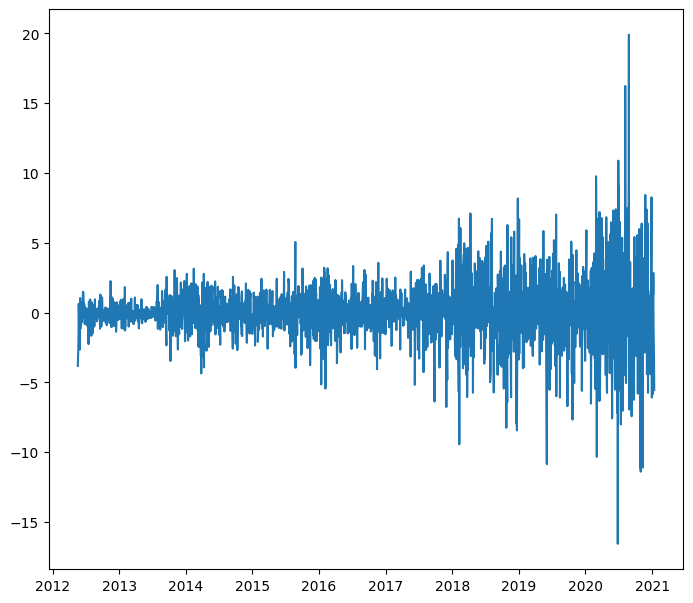

In [21]:
#Now since we have the desired data, lets visualize the data  with matplotlib
plt.clf
plt.figure(figsize=(18,16))
ax1=plt.subplot(221)
plt.plot(df['Movement'])
plt.show()

##### Normalisasi

In [22]:
# Menginisialisasi Min-Max Scaler
scaler = MinMaxScaler()
# Memilih kolom numerik yang akan dinormalisasi
columns_to_normalize = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Movement']
# Melakukan normalisasi pada kolom-kolom yang dipilih
# df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Tampilkan hasil
# print(df[columns_to_normalize])
df[columns_to_normalize]


,Open,High,Low,Close,Adj Close,Volume,Movement
Date,,,,,,,
2012-05-18,0.084976,0.093331,0.074229,0.071633,0.071633,1.000000,0.349328
2012-05-21,0.065407,0.064211,0.056080,0.056957,0.056957,0.285873,0.385522
2012-05-22,0.051510,0.053492,0.048603,0.046369,0.046369,0.168891,0.409926
2012-05-23,0.047114,0.049686,0.050127,0.049864,0.049864,0.119238,0.471346
2012-05-24,0.052716,0.052165,0.051615,0.053463,0.053463,0.078082,0.456265
...,...,...,...,...,...,...,...
2021-01-06,0.864719,0.871089,0.880073,0.858131,0.858131,0.032486,0.489992
2021-01-07,0.878545,0.884567,0.897387,0.877105,0.877105,0.017399,0.531944
2021-01-08,0.887089,0.875279,0.891579,0.873017,0.873017,0.022223,0.433781


### PCA

In [23]:
# Inisialisasi class
pca = PCA(n_components=2)

# Fliting the feature into PCA model
dataBaru = pca.fit_transform(df[columns_to_normalize])
print(dataBaru)

[[-0.70415113 -0.141624  ]
 [-0.71785606 -0.07639317]
 [-0.73679402 -0.0471665 ]
 ...
 [ 1.12531251 -0.02482323]
 [ 1.05808902 -0.10556301]
 [ 1.01927333 -0.15751138]]


In [24]:
# Egin vector
pca.explained_variance_ratio_

array([0.98056968, 0.0124919 ])

### Modeling

##### K-Means

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

Text(0, 0.5, 'Elbow Method')

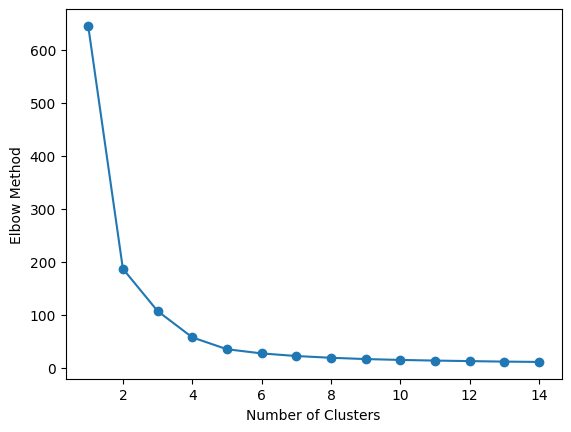

In [25]:
# check elbow
losses = []
for K in range(1, 15): # Sebaiknya dimulai dari 1 cluster, karena ingin memeriksa berapa jumlah kluster yang paling optimal
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(dataBaru)
    losses.append(kmeans.inertia_)

plt.plot(range(1,15), losses, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Elbow Method')

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

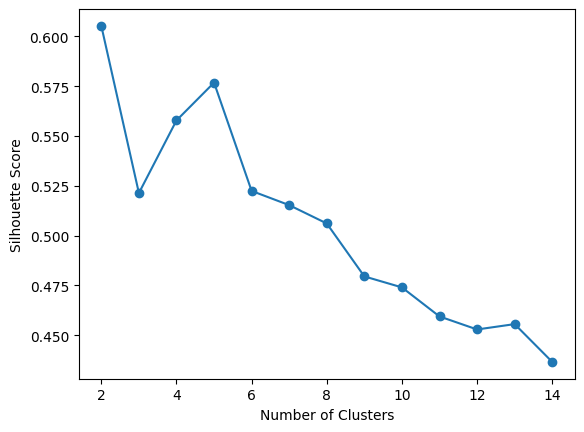

In [26]:
score = []  # List untuk menyimpan skor silhouette

for K in range(2, 15):  # Sebaiknya dimulai dari 2 cluster, karena minimal 2 cluster
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(dataBaru)
    score.append(silhouette_score(dataBaru, kmeans.labels_))

# Plot silhouette score
plt.plot(range(2, 15), score, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [27]:
kmeans = KMeans(n_clusters=4, random_state=42)
# Lakukan clustering hanya pada kolom 'Movement'
kmeans_label = kmeans.fit_predict(dataBaru)
# Tambahkan kolom 'K-Means label' ke DataFrame
df['K-Means label'] = kmeans_label
# Tampilkan hasil
means_label = pd.DataFrame(kmeans_label, columns=['K-Means label'])
pd.concat([df['K-Means label'], df[['Movement']]], axis=1)
# pd.concat([df['K-Means label'], dataBaru], axis=1)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,K-Means label,Movement
Date,,
2012-05-18,3,0.349328
2012-05-21,3,0.385522
2012-05-22,3,0.409926
2012-05-23,3,0.471346
2012-05-24,3,0.456265
...,...,...
2021-01-06,1,0.489992
2021-01-07,1,0.531944
2021-01-08,1,0.433781


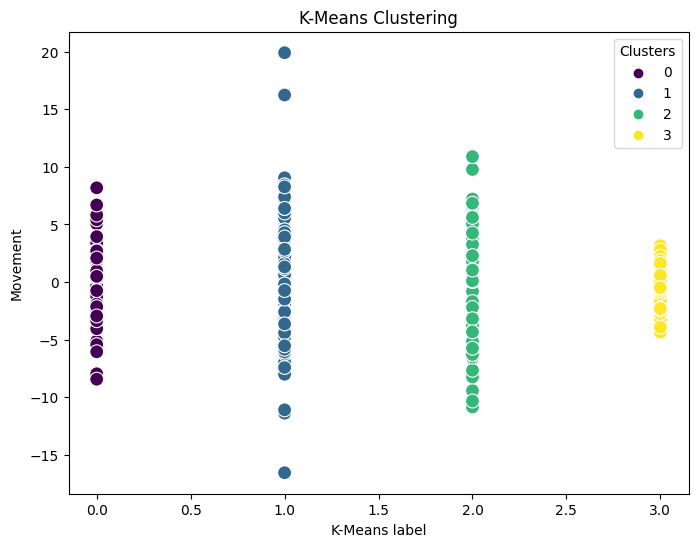

In [28]:
# Buat scatter plot dengan seaborn
plt.figure(figsize=(8, 6))
# sns.scatterplot(x=kmeans_label, y=df['Movement'], hue=kmeans_label, palette="viridis", s=100)
# sns.scatterplot(x=movement, y=kmeans_label, hue=kmeans_label, palette="viridis", s=100)
sns.scatterplot(x=kmeans_label, y=movement, hue=kmeans_label, palette="viridis", s=100)
plt.title('K-Means Clustering')
plt.xlabel('K-Means label')
plt.ylabel('Movement')
plt.legend(title='Clusters')
plt.show()

In [29]:
print(kmeans.inertia_)

56.96150951963073


##### Hierachical Clustering

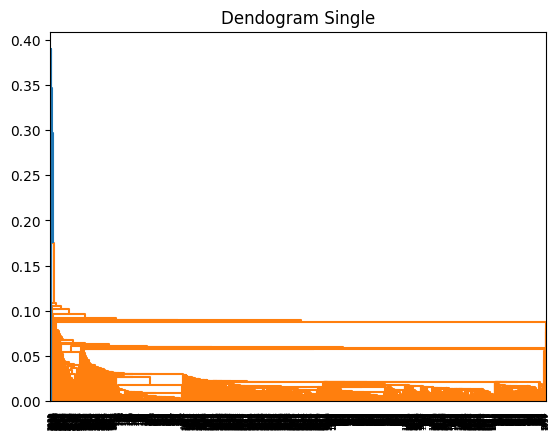

In [30]:
plt.title('Dendogram Single')
SingelDendogram = shc.linkage(dataBaru, method='single', metric='cityblock')
shc.dendrogram(Z=SingelDendogram)
plt.show()

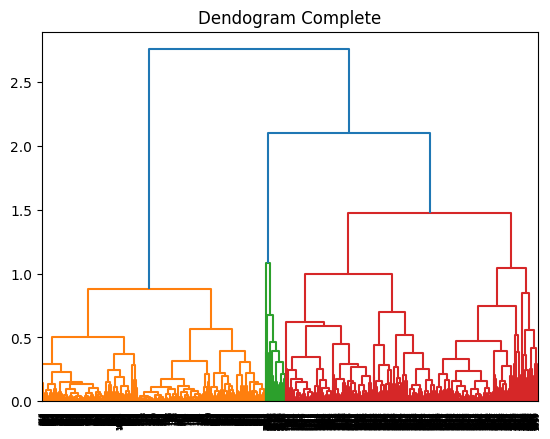

In [31]:
plt.title('Dendogram Complete')
CompleteDendogram = shc.linkage(dataBaru, method='complete', metric='cityblock')
shc.dendrogram(Z=CompleteDendogram)
plt.show()

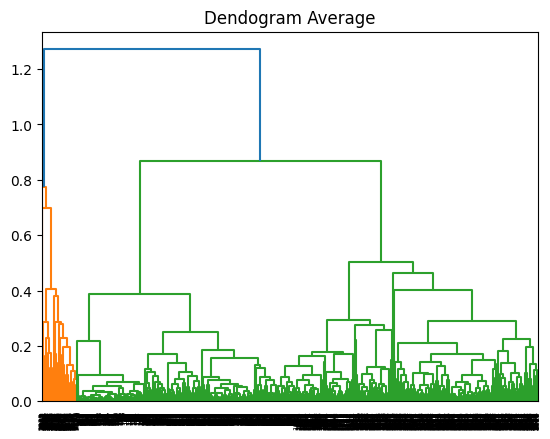

In [32]:
plt.title('Dendogram Average')
AverageDendogram = shc.linkage(dataBaru, method='average', metric='cityblock')
shc.dendrogram(Z=AverageDendogram)
plt.show()

##### DBSCAN

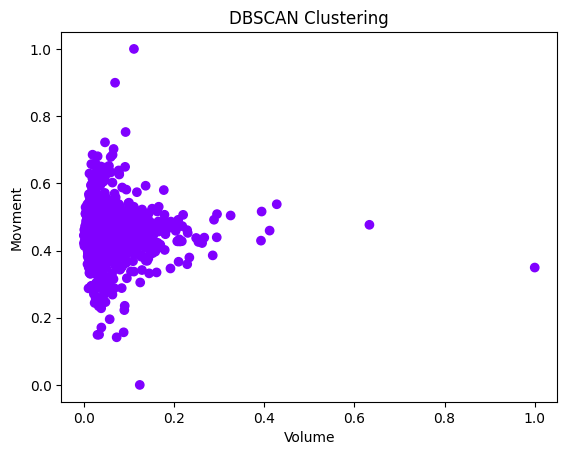

In [33]:
# Membuat objek DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cityblock')

# Melakukan clustering
dbscan_labels = dbscan.fit_predict(dataBaru)

# Menambahkan label cluster DBSCAN ke DataFrame
df['DBSCAN label'] = dbscan_labels

# Menampilkan hasil clustering
plt.scatter(df['Volume'], df[['Movement']], c=dbscan_labels, cmap='rainbow')
plt.xlabel('Volume')
plt.ylabel('Movment')
plt.title('DBSCAN Clustering')
plt.show()